In [1]:
import pandas as pd
import matplotlib.pyplot as plt # used for visualizations later

# Load the datasets
historical_spending = pd.read_csv('data/historical_spending.csv')
gifts_gender = pd.read_csv('data/gifts_gender.csv')
gifts_age = pd.read_csv('data/gifts_age.csv')

In [9]:
historical_spending.head(15)

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43
3,2013,60,130.97,11.64,13.48,30.94,8.32,27.93,11.46,10.23
4,2014,54,133.91,10.80,15.00,30.58,7.97,27.48,13.37,9.00
5,2015,55,142.31,12.70,15.72,36.30,7.87,27.27,14.72,11.05
6,2016,55,146.84,13.11,14.78,33.11,8.52,33.46,15.05,12.52
7,2017,54,136.57,12.68,14.63,32.32,7.36,28.46,13.91,10.23
8,2018,55,143.56,13.12,14.75,34.10,6.55,26.96,14.04,11.04
9,2019,51,161.96,14.12,15.07,30.34,7.31,27.72,16.08,10.31


In [3]:
gifts_gender.head()

,Gender,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,Men,27,52,56,30,37,33,20,18
1,Women,27,59,19,14,43,29,24,24


In [4]:
gifts_age.head()

,Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,18-24,51,70,50,33,33,41,33,23
1,25-34,40,62,44,34,33,37,27,19
2,35-44,31,58,41,29,42,30,26,22
3,45-54,19,60,37,20,42,31,20,23
4,55-64,18,50,32,13,43,29,19,20


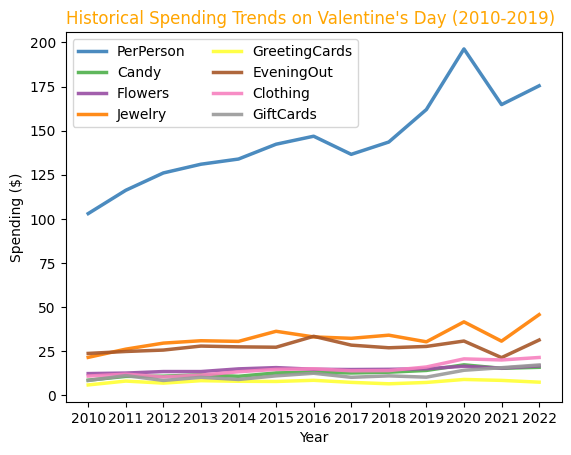

In [5]:
# Create a color palette
palette = plt.get_cmap('Set1')

# Plot each column
num = 0
for column in historical_spending.drop(['Year', 'PercentCelebrating'], axis=1):
    num += 1
    plt.plot(historical_spending['Year'], historical_spending[column], marker='', color=palette(num), linewidth=2.5, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Historical Spending Trends on Valentine's Day (2010-2019)", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Spending ($)")
plt.xticks(historical_spending['Year'])

# Show the plot
plt.show()

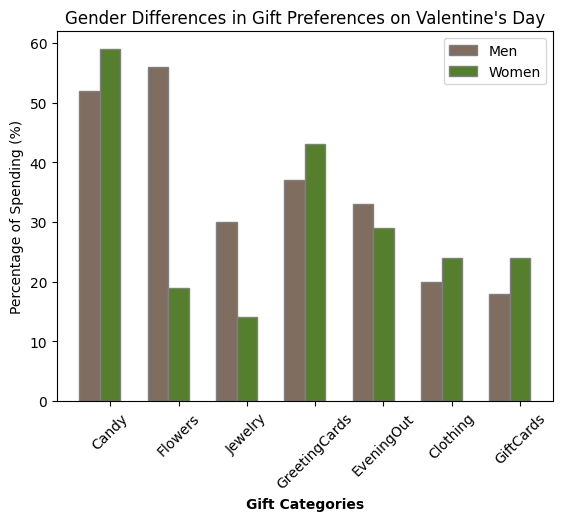

In [6]:
# Set the width of the bars
barWidth = 0.3

# Remove the 'SpendingCelebrating' column which is not a gift category
gifts_gender = gifts_gender.drop('SpendingCelebrating', axis=1)

# Set position of bar on X axis
r1 = range(len(gifts_gender.columns[1:]))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, gifts_gender.iloc[0, 1:], color='#7f6d5f', width=barWidth, edgecolor='grey', label='Men')
plt.bar(r2, gifts_gender.iloc[1, 1:], color='#557f2d', width=barWidth, edgecolor='grey', label='Women')

# Add xticks on the middle of the group bars
plt.xlabel('Gift Categories', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(gifts_gender.columns[1:]))], gifts_gender.columns[1:], rotation=45)
plt.ylabel('Percentage of Spending (%)')
plt.title('Gender Differences in Gift Preferences on Valentine\'s Day')

# Create legend & Show graphic
plt.legend()
plt.show()

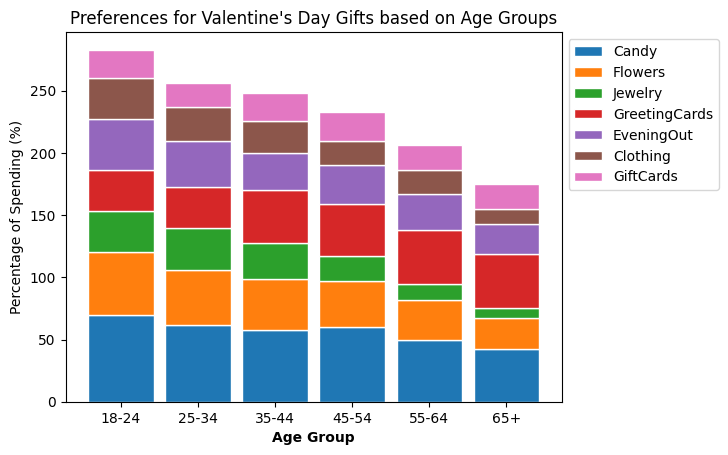

In [7]:
# Remove the 'SpendingCelebrating' column which is not a gift category
gifts_age = gifts_age.drop('SpendingCelebrating', axis=1)

# Set the width of the bars
barWidth = 0.85

# Set the position of the bars on the x-axis
r = range(len(gifts_age))

# Plot
for i, col in enumerate(gifts_age.columns[1:]):
    plt.bar(r, gifts_age[col], bottom=gifts_age[gifts_age.columns[1:i+1]].sum(axis=1), 
            edgecolor='white', width=barWidth, label=col)

# Add xticks on the middle of the group bars
plt.xlabel('Age Group', fontweight='bold')
plt.xticks(r, gifts_age['Age'])
plt.ylabel('Percentage of Spending (%)')
plt.title('Preferences for Valentine\'s Day Gifts based on Age Groups')

# Create legend & Show graphic
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()